In [2]:
# Install and import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set random seed for reproducibility
np.random.seed(1337)

## 1. Problem Understanding & Data Description
The *Billboard* Hot 100 is widely recognized as one of the most authoritative measures of popular music consumption in the United States. Established on August 4, 1958, the chart ranks songs based on a composite methodology that has evolved alongside changes in the music industry. Over time, this methodology has incorporated physical record sales, radio airplay, digital downloads, and streaming data. As a result, the Hot 100 provides a continuous, longitudinal record of popular music trends, reflecting shifts in listening practices, technological innovation, and cultural preferences. Songs that reach the No. 1 position often function as cultural touchstones, offering insight into dominant musical styles and broader social contexts at specific historical moments.

### Dataset
This [dataset](https://docs.google.com/spreadsheets/d/1j1AUgtMnjpFTz54UdXgCKZ1i4bNxFjf01ImJ-BqBEt0/edit?gid=1974823090#gid=1974823090) used covers every song that reached No. 1 on the *Billboard* Hot 100 from August 4, 1958 through January 11, 2025. It was assembled by Chris Dalla Riva during the research for his book [*Uncharted Territory: What Numbers Tell Us about the Biggest Hit Songs and Ourselves*](https://bio.site/uncharted_territory), and it also frequently supports his newsletter [*Can’t Get Much Higher*](https://www.cantgetmuchhigher.com/).

### Prediction Goal

This notebook explores whether a supervised machine learning model can predict (**classification**) whether the primary artist of a Billboard Hot 100 No. 1 song is categorized as white, not white, or both. While the prediction task is intentionally narrow and somewhat provocative, it is designed to foreground questions about how social categories are encoded, inferred, and reproduced within data-driven systems. Race is not an intrinsic or musically determined attribute, and any attempt to predict it necessarily relies on proxy variables shaped by historical inequities, industry practices, and cultural norms. As a result, model performance in this context should be interpreted less as evidence of meaningful signal and more as an indicator of how strongly these structural patterns are embedded in the dataset itself.

In [3]:
songs = pd.read_csv('https://raw.githubusercontent.com/A1-3x/billboard/refs/heads/main/Billboard.csv')

for col in songs.columns:
    print(col)

Song
Artist
Date
Weeks at Number One
Non-Consecutive
Rating 1
Rating 2
Rating 3
Overall Rating
Divisiveness
Label
Parent Label
CDR Genre
CDR Style
Discogs Genre
Discogs Style
Artist Structure
Featured Artists
Multiple Lead Vocalists
Group Named After Non-Lead Singer
Talent Contestant
Posthumous
Artist Place of Origin
Front Person Age
Artist Male
Artist White
Artist Black
Songwriters
Songwriters w/o Interpolation & Sample Credits
Songwriter Male
Songwriter White
Artist is a Songwriter
Artist is Only Songwriter
Producers
Producer Male
Producer White
Artist is a Producer
Artist is Only Producer
Songwriter is a Producer
Time Signature
Keys
Simplified Key
BPM
Energy
Danceability
Happiness
Loudness (dB)
Acousticness
Vocally Based
Bass Based
Guitar Based
Piano/Keyboard Based
Orchestral Strings
Horns/Winds
Accordion
Banjo
Bongos
Clarinet
Cowbell
Falsetto Vocal
Flute/Piccolo
Handclaps/Snaps
Harmonica
Human Whistling
Kazoo
Mandolin
Pedal/Lap Steel
Ocarina
Saxophone
Sitar
Trumpet
Ukulele
Violin
S

|   Target Variable |
|-------------------|
|   Artist White    |

|   Feature    |   Description |
|---------------|---------------|
|   BPM         |   Beats per minute    |
|   Energy      |   Energy measure from 0 to 100 as provided by Spotify |
|   Danceability    |   Danceability measure from 0 to 100 as provided by Spotify   |
|   Happiness |  Happiness measure from 0 to 100 as provided by Spotify |
|   Acousticness |   Probability between 0 and 100 that a song is acoustic from Spotify |
|   Loudness (dB)   |   Loudness measured in decibels as provided by Spotify    |
|   Explicit    |    Dummy for if Spotify labels the song as explicit    |

The first six features are chosen because an SVM works well with numerical features. This selection is an attempt to encode style in a manner that has the potential to illuminate patterns in culture.

## 2. Model Training & Hyperparameter Selection


🤖 Training the Classifier
--------------------------------------------------
✅ Training complete!

The classifier learned from 822 examples

🌳 Visualizing How the Classifier Makes Decisions
--------------------------------------------------


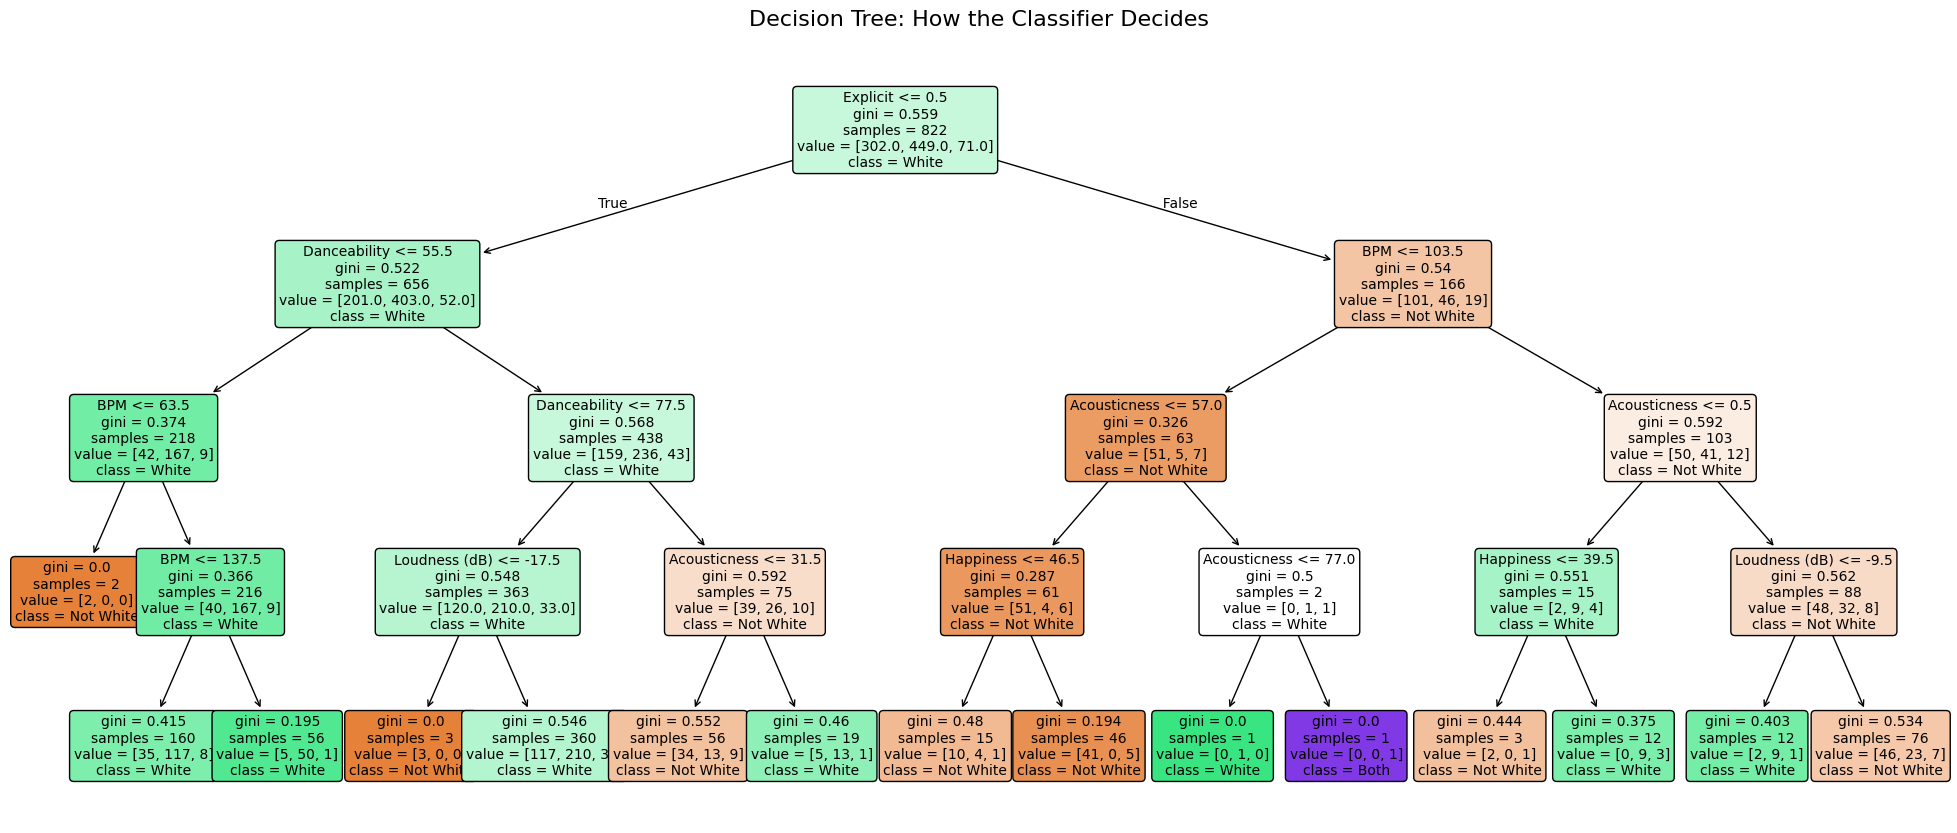

📖 Key:
   - Orange = Not White
   - Green = White
   - Purple = Both


In [ ]:
feature_cols = [
    'BPM', 
    'Energy', 'Danceability', 
    'Happiness',
    'Acousticness', 
    'Loudness (dB)',
    'Explicit'

]
target_col = 'Artist White'

# Drop rows with missing target or features so y_test has no NaN (accuracy_score fails on NaN)
songs_clean = songs.dropna(subset=feature_cols + [target_col])
X = songs_clean[feature_cols]
y = songs_clean[target_col]

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1337
)


print("\n🤖 Training the Classifier")
print("-" * 50)

# Create a Decision Tree Classifier (easy to understand)
classifier = DecisionTreeClassifier(
    max_depth=4,  # Tried: 3, 5, 6
    random_state=1337
)

# Train the model
classifier.fit(X_train, y_train)

print("✅ Training complete!")
print(f"\nThe classifier learned from {len(X_train)} examples")



print("\n🌳 Visualizing How the Classifier Makes Decisions")
print("-" * 50)

plt.figure(figsize=(25, 10))
plot_tree(classifier,
          feature_names=X.columns,
          class_names=['Not White', 'White', 'Both'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree: How the Classifier Decides", fontsize=16, pad=20)
plt.show()

print("📖 Key:")
print("   - Orange = Not White")
print("   - Green = White")
print("   - Purple = Both")

In [24]:
print("\n🔮 Making Predictions on New Data")
# Make predictions on test set
y_pred = classifier.predict(X_test)
print("\n📊 Evaluating Classifier Performance")
print("=" * 50)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Overall Accuracy: {accuracy*100:.1f}%")
print(f"   The classifier correctly predicted {int(accuracy*len(y_test))} out of {len(y_test)} cases")

# Confusion Matrix
print("\n📋 Confusion Matrix:")
print("-" * 50)
cm = confusion_matrix(y_test, y_pred)
print(f"                  Predicted")
print(f"                  Not White  |  White    |  Both")
print(f"Actual  Not White    {cm[0,0]:3d}     |   {cm[0,1]:3d}     |   {cm[0,2]:3d}")
print(f"        White        {cm[1,0]:3d}     |   {cm[1,1]:3d}     |   {cm[1,2]:3d}")
print(f"        Both         {cm[2,0]:3d}     |   {cm[2,1]:3d}     |   {cm[2,2]:3d}")

print("\n📈 Detailed Metrics:")
print("-" * 50)
print(classification_report(y_test, y_pred,
                          target_names=['Not White', 'White', 'Both']))



🔮 Making Predictions on New Data

📊 Evaluating Classifier Performance

🎯 Overall Accuracy: 60.1%
   The classifier correctly predicted 212 out of 353 cases

📋 Confusion Matrix:
--------------------------------------------------
                  Predicted
                  Not White  |  White    |  Both
Actual  Not White     52     |    80     |     1
        White         30     |   160     |     0
        Both          15     |    15     |     0

📈 Detailed Metrics:
--------------------------------------------------
              precision    recall  f1-score   support

   Not White       0.54      0.39      0.45       133
       White       0.63      0.84      0.72       190
        Both       0.00      0.00      0.00        30

    accuracy                           0.60       353
   macro avg       0.39      0.41      0.39       353
weighted avg       0.54      0.60      0.56       353




🌲 Training a Random Forest Classifier
🎯 Random Forest Accuracy: 62.3%

📋 Random Forest Confusion Matrix:
                  Predicted
                  Not White  |  White    |  Both
Actual  Not White     51     |    82     |     0
        White         21     |   169     |     0
        Both          14     |    16     |     0

📊 Feature Importance (which features matter most?):
--------------------------------------------------


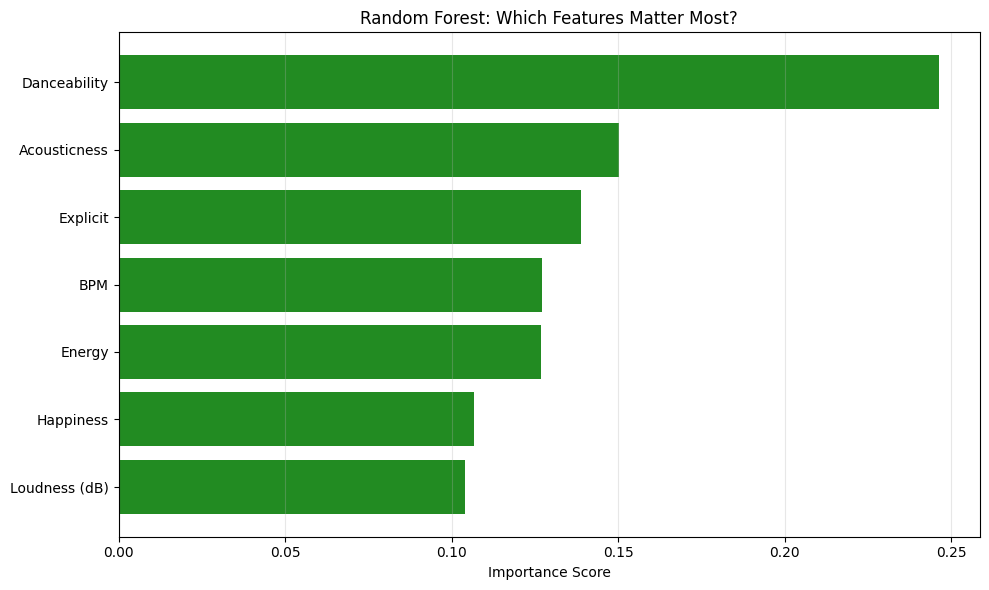

      Feature  Importance
 Danceability    0.246288
 Acousticness    0.150267
     Explicit    0.138782
          BPM    0.127073
       Energy    0.126774
    Happiness    0.106763
Loudness (dB)    0.104054


In [ ]:
from sklearn.ensemble import RandomForestClassifier

print("\n🌲 Training a Random Forest Classifier")
print("=" * 50)

# Create and train Random Forest
rf_classifier = RandomForestClassifier(
    n_estimators=1000,  # Number of trees in the forest | Tried: 100, 10000
    max_depth=5, # Tried: 4, 6, 7
    random_state=1337
)

rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

# Evaluate
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"🎯 Random Forest Accuracy: {rf_accuracy*100:.1f}%")

# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_pred)
print(f"\n📋 Random Forest Confusion Matrix:")
print(f"                  Predicted")
print(f"                  Not White  |  White    |  Both")
print(f"Actual  Not White    {rf_cm[0,0]:3d}     |   {rf_cm[0,1]:3d}     |   {rf_cm[0,2]:3d}")
print(f"        White        {rf_cm[1,0]:3d}     |   {rf_cm[1,1]:3d}     |   {rf_cm[1,2]:3d}")
print(f"        Both         {rf_cm[2,0]:3d}     |   {rf_cm[2,1]:3d}     |   {rf_cm[2,2]:3d}")

# Feature Importance
print("\n📊 Feature Importance (which features matter most?):")
print("-" * 50)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_classifier.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='forestgreen')
plt.xlabel('Importance Score')
plt.title('Random Forest: Which Features Matter Most?')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print(feature_importance.to_string(index=False))

In [21]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

print("\n⚡ Training a Support Vector Machine (SVM)")
print("=" * 50)

# SVMs work better with scaled features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train SVM
svm_classifier = SVC(
    kernel='rbf',  # Tried: linear, poly, sigmoid
    random_state=1337
)

svm_classifier.fit(X_train_scaled, y_train)
svm_pred = svm_classifier.predict(X_test_scaled)

# Evaluate
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"🎯 SVM Accuracy: {svm_accuracy*100:.1f}%")

# Confusion Matrix
svm_cm = confusion_matrix(y_test, svm_pred)
print(f"\n📋 SVM Confusion Matrix:")
print(f"                  Predicted")
print(f"                  Not White  |  White    |  Both")
print(f"Actual  Not White    {svm_cm[0,0]:3d}     |   {svm_cm[0,1]:3d}     |   {svm_cm[0,2]:3d}")
print(f"        White        {svm_cm[1,0]:3d}     |   {svm_cm[1,1]:3d}     |   {svm_cm[1,2]:3d}")
print(f"        Both         {svm_cm[2,0]:3d}     |   {svm_cm[2,1]:3d}     |   {svm_cm[2,2]:3d}")

print("\n📝 Detailed SVM Report:")
print("-" * 50)
print(classification_report(y_test, svm_pred,
                          target_names=['Not White', 'White', 'Both']))


⚡ Training a Support Vector Machine (SVM)
🎯 SVM Accuracy: 61.2%

📋 SVM Confusion Matrix:
                  Predicted
                  Not White  |  White    |  Both
Actual  Not White     46     |    87     |     0
        White         20     |   170     |     0
        Both          12     |    18     |     0

📝 Detailed SVM Report:
--------------------------------------------------
              precision    recall  f1-score   support

   Not White       0.59      0.35      0.44       133
       White       0.62      0.89      0.73       190
        Both       0.00      0.00      0.00        30

    accuracy                           0.61       353
   macro avg       0.40      0.41      0.39       353
weighted avg       0.55      0.61      0.56       353



C:\Users\Home\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Home\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Home\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

In [ ]:
## 3. Evaluation & Visualization of Predictions


🏆 Comparing All Classifiers

📊 Performance Summary:
        Model  Accuracy  True Positives  False Positives  True Negatives  False Negatives
Decision Tree  0.600567             160               80              52               30
Random Forest  0.617564             168               83              50               22
          SVM  0.611898             170               87              46               20


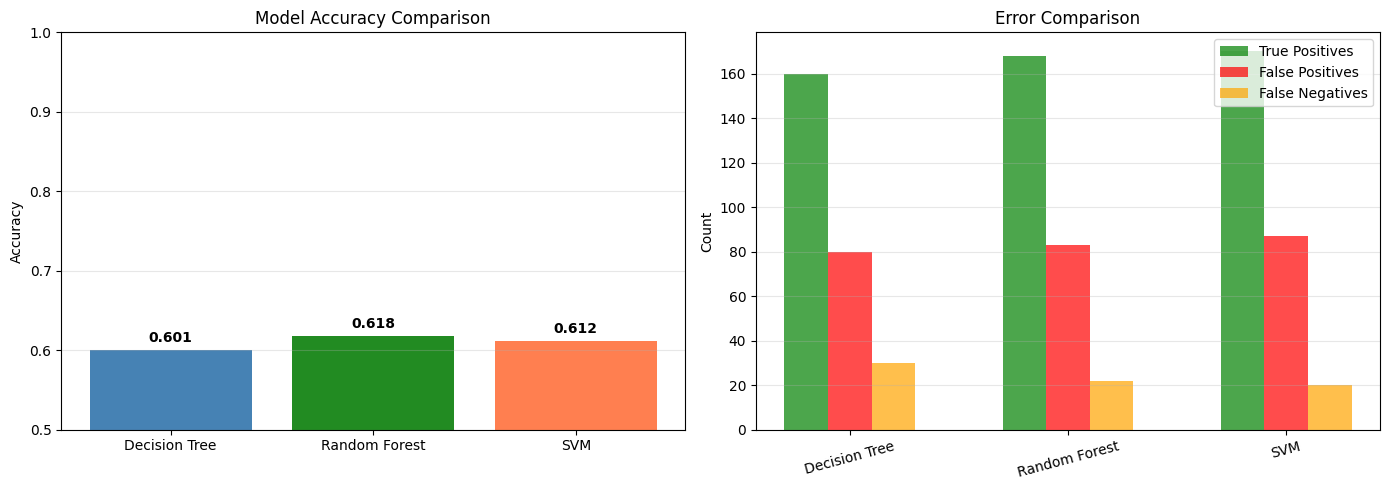

In [25]:
print("\n🏆 Comparing All Classifiers")
print("=" * 50)

# Collect all predictions and metrics
models_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'SVM'],
    'Accuracy': [accuracy, rf_accuracy, svm_accuracy],
    'True Positives': [cm[1,1], rf_cm[1,1], svm_cm[1,1]],
    'False Positives': [cm[0,1], rf_cm[0,1], svm_cm[0,1]],
    'True Negatives': [cm[0,0], rf_cm[0,0], svm_cm[0,0]],
    'False Negatives': [cm[1,0], rf_cm[1,0], svm_cm[1,0]]
})

print("\n📊 Performance Summary:")
print(models_comparison.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy comparison
axes[0].bar(models_comparison['Model'], models_comparison['Accuracy'],
            color=['steelblue', 'forestgreen', 'coral'])
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Model Accuracy Comparison')
axes[0].set_ylim([0.5, 1.0])
axes[0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(models_comparison['Accuracy']):
    axes[0].text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

# Confusion matrices side by side
x = np.arange(3)
width = 0.2

axes[1].bar(x - width, models_comparison['True Positives'], width,
            label='True Positives', color='green', alpha=0.7)
axes[1].bar(x, models_comparison['False Positives'], width,
            label='False Positives', color='red', alpha=0.7)
axes[1].bar(x + width, models_comparison['False Negatives'], width,
            label='False Negatives', color='orange', alpha=0.7)

axes[1].set_ylabel('Count')
axes[1].set_title('Error Comparison')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models_comparison['Model'], rotation=15)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()
